In [1]:
# reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import rck as rck_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import joblib
from IPython.display import clear_output
from copy import deepcopy
import shutil
import os
import pickle

# Functions

In [3]:
from multiprocessing import Pool

def multi_process(df, func, processes = 80, array = False, tq = True): 
    
    input = list(df.itertuples(index=False, name=None))
    
    pool = Pool(processes = processes) 
    
    try: 
        if tq : 
            output = pool.map(func, tqdm(input)) 
        else : 
            output = pool.map(func, input) 
        pool.close() 
    except KeyboardInterrupt or Exception: 
        pool.terminate() 
        raise 
    finally: 
        pool.join() 
    if array: 
        return np.array(output) 
    else : 
        return output


def run_simulation(my_list):

    results = rck_module.RCK(*my_list)
    results.run_simulation()
    # results.run_equilibrium_solution()

    return results

def run_eq(my_list):

    results = rck_module.RCK(*my_list)
    results.run_equilibrium_solution()

    return results

# Recursive function

In [20]:
rck_vars = pd.DataFrame({
            'alpha': 0.5,
            'delta': 0,
            'n': 1,
            'rho': 4,
            'T': 200,
            'c0': 0.02,
            'k0':0.01,
            'u0': 1,
            'deltaT': 10,
            'n_scenarios': 2,
            'noise_std' : 0.,
            'flex' : 0.05,
            'dt':0.1,
            'model': None,
            'scalerx': None,
            'scalery': None,
            'seed': np.random.randint(100000, size=1)
            })

In [26]:
my_list = list(rck_vars.itertuples(index=False, name=None))
results = rck_module.RCK(*my_list[0])
results.run_equilibrium_solution()

In [37]:
my_list = list(rck_vars.itertuples(index=False, name=None))
results = rck_module.RCK(*my_list[0])
results.run_simulation()

  0%|          | 0/199 [00:00<?, ?it/s]c:\Users\fortu\Desktop\università\PhD\2. I-Agent\0. Code\27_11_23\rck.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  dcdt = (self.alpha * k_eq[j] ** (self.alpha - 1) - self.delta - self.rho) * c_eq[j]
c:\Users\fortu\Desktop\università\PhD\2. I-Agent\0. Code\27_11_23\rck.py:173: RuntimeWarning: invalid value encountered in double_scalars
  dcdt = (self.alpha * k_eq[j] ** (self.alpha - 1) - self.delta - self.rho) * c_eq[j]
c:\Users\fortu\Desktop\università\PhD\2. I-Agent\0. Code\27_11_23\rck.py:185: RuntimeWarning: divide by zero encountered in power
  r = self.alpha * k_eq**(self.alpha -1)
 36%|███▌      | 72/199 [00:00<00:00, 353.95it/s]

[[0.02       0.02       0.02       ... 0.02       0.02       0.02      ]
 [0.019      0.019      0.019      ... 0.021      0.021      0.021     ]
 [0.01805    0.01805    0.01805    ... 0.02205    0.02205    0.02205   ]
 ...
 [0.01326841 0.01326841 0.01326841 ... 0.02954911 0.02954911 0.02954911]
 [0.01260499 0.01260499 0.01393183 ... 0.02807165 0.03102656 0.03102656]
 [0.01197474 0.01323524 0.01323524 ... 0.02947524 0.02947524 0.03257789]]
[[0.021      0.021      0.021      ... 0.021      0.021      0.021     ]
 [0.01995    0.01995    0.01995    ... 0.02205    0.02205    0.02205   ]
 [0.0189525  0.0189525  0.0189525  ... 0.0231525  0.0231525  0.0231525 ]
 ...
 [0.01393183 0.01393183 0.01393183 ... 0.03102656 0.03102656 0.03102656]
 [0.01323524 0.01323524 0.01462842 ... 0.02947524 0.03257789 0.03257789]
 [0.01257348 0.013897   0.013897   ... 0.030949   0.030949   0.03420679]]
[[0.02205    0.02205    0.02205    ... 0.02205    0.02205    0.02205   ]
 [0.0209475  0.0209475  0.0209475  ... 

c:\Users\fortu\Desktop\università\PhD\2. I-Agent\0. Code\27_11_23\rck.py:185: RuntimeWarning: invalid value encountered in power
  r = self.alpha * k_eq**(self.alpha -1)
c:\Users\fortu\Desktop\università\PhD\2. I-Agent\0. Code\27_11_23\rck.py:186: RuntimeWarning: invalid value encountered in sqrt
  w = (1 - self.alpha) * k_eq**self.alpha
c:\Users\fortu\Desktop\università\PhD\2. I-Agent\0. Code\27_11_23\rck.py:203: RuntimeWarning: invalid value encountered in double_scalars
  - (self.delta + self.n) * self.k[t - 1]
 72%|███████▏  | 144/199 [00:00<00:00, 341.63it/s]

[[0.54919698 0.54919698 0.54919698 ... 0.54919698 0.54919698 0.54919698]
 [0.52173713 0.52173713 0.52173713 ... 0.57665683 0.57665683 0.57665683]
 [0.49565028 0.49565028 0.49565028 ... 0.60548967 0.60548967 0.60548967]
 ...
 [0.3643485  0.3643485  0.3643485  ...        nan        nan        nan]
 [0.34613107 0.34613107 0.38256592 ...        nan        nan        nan]
 [0.32882452 0.36343763 0.36343763 ...        nan        nan        nan]]
[[0.52173713 0.52173713 0.52173713 ... 0.52173713 0.52173713 0.52173713]
 [0.49565028 0.49565028 0.49565028 ... 0.54782399 0.54782399 0.54782399]
 [0.47086776 0.47086776 0.47086776 ... 0.57521519 0.57521519 0.57521519]
 ...
 [0.34613107 0.34613107 0.34613107 ...        nan        nan        nan]
 [0.32882452 0.32882452 0.36343763 ...        nan        nan        nan]
 [0.31238329 0.34526575 0.34526575 ...        nan        nan        nan]]
[[0.49565028 0.49565028 0.49565028 ... 0.49565028 0.49565028 0.49565028]
 [0.47086776 0.47086776 0.47086776 ... 

100%|██████████| 199/199 [00:00<00:00, 322.05it/s]

[[ 9.14319154  9.14319154  9.14319154 ...  9.14319154  9.14319154
   9.14319154]
 [ 8.68603196  8.68603196  8.68603196 ...  9.60035111  9.60035111
   9.60035111]
 [ 8.25173036  8.25173036  8.25173036 ... 10.08036867 10.08036867
  10.08036867]
 ...
 [ 6.06578007  6.06578007  6.06578007 ... 13.50865811 13.50865811
  13.50865811]
 [ 5.76249107  5.76249107  6.36906908 ... 12.8332252  14.18409101
  14.18409101]
 [ 5.47436652  6.05061562  6.05061562 ... 13.47488646 13.47488646
  14.89329557]]
[[ 9.60035111  9.60035111  9.60035111 ...  9.60035111  9.60035111
   9.60035111]
 [ 9.12033356  9.12033356  9.12033356 ... 10.08036867 10.08036867
  10.08036867]
 [ 8.66431688  8.66431688  8.66431688 ... 10.5843871  10.5843871
  10.5843871 ]
 ...
 [ 6.36906908  6.36906908  6.36906908 ... 14.18409101 14.18409101
  14.18409101]
 [ 6.05061562  6.05061562  6.68752253 ... 13.47488646 14.89329557
  14.89329557]
 [ 5.74808484  6.3531464   6.3531464  ... 14.14863079 14.14863079
  15.63796034]]
[[10.08036867 10.

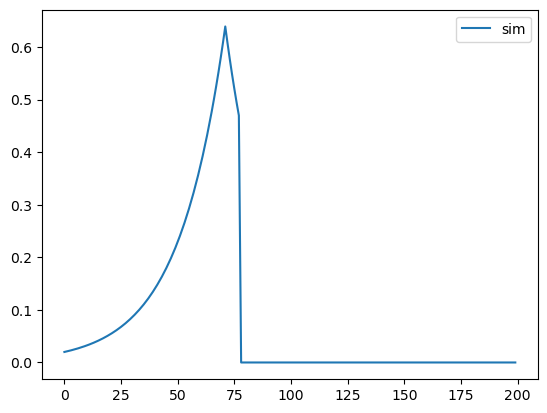

In [35]:
# plt.plot(results_eq.c, label = 'eq')
plt.plot(results.c, label = 'sim')
plt.legend()

In [32]:
flex = 0.5
number_possible_scenarios = 10
deltaT = 10
dt = 0.1

c = np.zeros((deltaT + 1, number_possible_scenarios**deltaT))
a = np.zeros((deltaT + 1, number_possible_scenarios**deltaT))
u = np.zeros((deltaT + 1, number_possible_scenarios**deltaT))

c[0, :] = 0.05
a[0, :] = 0.05

r = results.alpha * results.k**(results.alpha -1)
w = (1 - results.alpha) * results.k**results.alpha

def create_new_array(c):
    return np.linspace(c*(1 - flex), c*(1 + flex), number_possible_scenarios).T

def budget_constrain(results, c, a, r, w):
    return (a + dt * (r * a + w - c)).T

def utility_equation(results, c: float, t: float):
    return np.exp(-(results.rho - results.n) * t) * results.u0 * np.log(np.maximum(1e-8, c))

for j in np.arange(1, deltaT + 1): 
    k_range = np.arange(0, number_possible_scenarios ** deltaT, step=number_possible_scenarios ** (deltaT - j + 1)) 
    building_c = np.repeat(create_new_array(c[0, k_range]).flatten(), number_possible_scenarios ** (deltaT - j))
    building_a = np.repeat(budget_constrain(results, c[j - 1, k_range], a[j-1, k_range], r[j-1], w[j-1]).flatten(), number_possible_scenarios ** (deltaT - j + 1))
    c[j, :] = building_c 
    a[j, :] = building_a
    c[j, a[j, :] < 0] = np.nan
    u[j, :] = u[j-1,:] + utility_equation(results, np.where(a[j,:] < 0, np.nan, c[j, :]), (j-1) * dt)

print(c[1, np.argmax(u, axis=1)[-1]])


0.07500000000000001


C:\Users\fortu\AppData\Local\Temp\ipykernel_25580\1895126184.py:10: RuntimeWarning: divide by zero encountered in power
  r = results.alpha * results.k**(results.alpha -1)
C:\Users\fortu\AppData\Local\Temp\ipykernel_25580\1895126184.py:10: RuntimeWarning: invalid value encountered in power
  r = results.alpha * results.k**(results.alpha -1)
C:\Users\fortu\AppData\Local\Temp\ipykernel_25580\1895126184.py:11: RuntimeWarning: invalid value encountered in sqrt
  w = (1 - results.alpha) * results.k**results.alpha


In [5]:
import numpy as np

# Initial configuration
c0 = 1.0  # Initial consumption value
k0 = 1.0  # Initial capital value
T = 10    # Time horizon
std_dev = 0.05 * c0  # Standard deviation for Gaussian distribution


# Optimized approach with a fixed number of paths at each time step
fixed_path_count = 100  # Maximum number of paths to consider at each time step

# Initialize a list for the optimized consumption paths
optimized_consumption_paths = [[c0] * 5]  # Start with 5 paths at t=0

# Generate consumption values for each time step with fixed number of paths
for t in range(1, T):
    # Randomly select paths from the previous time step, up to the fixed count
    selected_paths = np.random.choice(optimized_consumption_paths[-1], fixed_path_count)

    # Generate new consumption values based on the selected paths
    current_consumptions = [np.random.normal(c, std_dev) for c in selected_paths]

    # Add the current time step's consumptions to the list
    optimized_consumption_paths.append(current_consumptions)

# The final list contains consumption values at T=10 with limited paths
final_consumptions_at_T10 = optimized_consumption_paths[-1]
len(final_consumptions_at_T10), final_consumptions_at_T10[:10]  # Display length and first 10 elements


(100,
 [0.8752873839693016,
  0.9140340932987485,
  1.1969410311190662,
  1.1509807012548732,
  1.014509449992557,
  1.2637244640396312,
  1.0390307560980032,
  0.9498655457558642,
  1.2344238403558883,
  0.9472049014075139])

In [3]:
np.unique(c[-1,:])

NameError: name 'np' is not defined

In [10]:
import numpy as np

def create_new_array(c):
    return np.linspace(c*(1 - flex), c*(1 + flex), number_possible_scenarios).T

# Example usage:
c_values = np.array([1, 2])  # Replace with your desired values for 'c'
flex = 0.5  # Replace with your desired value for 'flex'

result_arrays = create_new_array(c_values)

# Flatten the result arrays
result_1d_arrays = result_arrays.ravel()

print(result_1d_arrays)


[0.5 1.5 1.  3. ]


In [11]:
np.unique(c[1,:])

array([-0.075, -0.025])

In [12]:
u[-1,:]

array([-70.89626628, -70.89626628, -70.89626628, ..., -70.89626628,
       -70.89626628, -70.89626628])

In [13]:
np.any(c == np.nan)

False

In [14]:
a

array([[ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ],
       [ 0.085     ,  0.085     ,  0.085     , ...,  0.085     ,
         0.085     ,  0.085     ],
       [ 0.12661521,  0.12661521,  0.12661521, ...,  0.13161521,
         0.13161521,  0.13161521],
       ...,
       [ 1.87575237,  1.87575237,  1.87575237, ..., 20.34925019,
        20.34925019, 20.34925019],
       [ 2.06865415,  2.06865415,  2.06865415, ..., 29.55045043,
        29.55045043, 29.55045043],
       [ 2.27406523,  2.27406523,  2.27406525, ..., 35.78915486,
        43.17861426, 43.17861426]])

In [15]:
a

array([[ 0.05      ,  0.05      ,  0.05      , ...,  0.05      ,
         0.05      ,  0.05      ],
       [ 0.085     ,  0.085     ,  0.085     , ...,  0.085     ,
         0.085     ,  0.085     ],
       [ 0.12661521,  0.12661521,  0.12661521, ...,  0.13161521,
         0.13161521,  0.13161521],
       ...,
       [ 1.87575237,  1.87575237,  1.87575237, ..., 20.34925019,
        20.34925019, 20.34925019],
       [ 2.06865415,  2.06865415,  2.06865415, ..., 29.55045043,
        29.55045043, 29.55045043],
       [ 2.27406523,  2.27406523,  2.27406525, ..., 35.78915486,
        43.17861426, 43.17861426]])

In [16]:
c

array([[-5.00000000e-02, -5.00000000e-02, -5.00000000e-02, ...,
        -5.00000000e-02, -5.00000000e-02, -5.00000000e-02],
       [-2.50000000e-02, -2.50000000e-02, -2.50000000e-02, ...,
        -7.50000000e-02, -7.50000000e-02, -7.50000000e-02],
       [-1.25000000e-02, -1.25000000e-02, -1.25000000e-02, ...,
        -1.12500000e-01, -1.12500000e-01, -1.12500000e-01],
       ...,
       [-1.90734863e-07, -1.90734863e-07, -1.90734863e-07, ...,
        -7.38945940e+01, -7.38945940e+01, -7.38945940e+01],
       [-9.53674316e-08, -9.53674316e-08, -2.86102295e-07, ...,
        -3.69472970e+01, -1.10841891e+02, -1.10841891e+02],
       [-4.76837158e-08, -1.43051147e-07, -1.43051147e-07, ...,
        -5.54209455e+01, -5.54209455e+01, -1.66262837e+02]])

In [17]:
u

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-18.42068074, -18.42068074, -18.42068074, ..., -18.42068074,
        -18.42068074, -18.42068074],
       [-32.06705668, -32.06705668, -32.06705668, ..., -32.06705668,
        -32.06705668, -32.06705668],
       ...,
       [-70.75143282, -70.75143282, -70.75143282, ..., -70.75143282,
        -70.75143282, -70.75143282],
       [-70.83463132, -70.83463132, -70.83463132, ..., -70.83463132,
        -70.83463132, -70.83463132],
       [-70.89626628, -70.89626628, -70.89626628, ..., -70.89626628,
        -70.89626628, -70.89626628]])

In [18]:
budget_constrain(np.array([3, 4])).transpose().ravel()

TypeError: budget_constrain() missing 4 required positional arguments: 'c', 'a', 'r', and 'w'

In [ ]:
dT = 10
dim = 10

# I create a matrix just to keep truck of the changes and being able to control 
c = np.zeros((dT + 1, dim))
a = np.zeros((dT + 1, dim))
U = np.zeros((dT + 1, dim))

# The first raw was the previous timestep
c[0,:] = 0.05
a[0,:] = 0.05

# wage and return on capital
r = results.alpha * results.k**(results.alpha -1)
w = (1 - results.alpha) * results.k**results.alpha

# The last raw is the "aceptable" consumption
c[dT, :] = np.linspace(-1,1,dim)
a[dT, :] = (1/dt + r[dT])**-1 * (c[dT]-w[dT])

def budget_constrain(results, c, a, r, w):
    return a + dt * (r * a + w - c)

for t in np.linspace(dT-1, 0, dT-1, dtype = int):
    
    c[]



[0.221449153328262,
 0.221449153328262,
 0.21751387718893214,
 0.21751387718893214,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.221449153328262,
 0.2214491533282

In [ ]:
import numpy as np

# Parameters
theta = 0.5  # Coefficient of relative risk aversion
alpha = 0.3  # Output elasticity of capital
delta = 0.05 # Depreciation rate of capital
K_initial = 100 # Initial capital stock
time_horizon = 10 # Time horizon for the optimization
num_consumption_points = 100 # Number of consumption points to consider in each period

# Utility function
def utility(C):
    return (C**(1 - theta) - 1) / (1 - theta)

# Capital update function
def update_capital(K, C):
    # Assuming Cobb-Douglas production function with L=1 and no technological progress
    Y = K**alpha
    return Y - C + (1 - delta) * K

# Recursive function to calculate maximum utility over time horizon
def max_utility(K, t):
    if t == time_horizon:
        return 0, []

    max_U = -np.inf
    optimal_consumption = None
    optimal_path = None

    # Discretize the consumption choices
    for C in np.linspace(0.01, K**alpha, num_consumption_points):
        next_K = update_capital(K, C)
        U, path = max_utility(next_K, t + 1)
        total_U = utility(C) + U

        if total_U > max_U:
            max_U = total_U
            optimal_consumption = C
            optimal_path = path

    return max_U, [optimal_consumption] + optimal_path

# Find the optimal consumption path
max_U, optimal_consumption_path = max_utility(K_initial, 0)
optimal_consumption_path


KeyboardInterrupt: 

In [ ]:
np.linspace(10, 0, 10, dtype = int)

array([10,  9,  9,  9,  9,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  6,  6,
        6,  6,  6,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,  3,  3,  3,  3,
        3,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0])

array([0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])